# **Project Title: E-commerce Sales Funnel Revenue Leakage Optimization Initiative**

#### Here, we used reservoir sample method for the random sampling of the dataset UserBehaviour.csv by Taobao whith 70M+ rows to make an actionable dataset of 500K rows to garner actionable insights

#### Now,we'll run an analysis to first get a **5M** row dataset fro ample events and then add features to it,sessionalize it,perform zero duration analysis and bot detetction analysis to finalise the cleaned dataset ,now from that dataset,we will again perfrom reservoir analysis to make an actionable dataset of **500k** events and then we will comment out the previous codes so if any re run is done by others, it wont affect the indicators,factors related to user behaviour like **KPIs**, **metrics**, etc.

In [1]:
# import pandas as pd 
# import random
# import csv

# def reservoir_sample_csv(file_path, sample_size=5000000):
#     reservoir = []
#     with open(file_path, mode='r', encoding='utf-8') as f:
#         reader = csv.reader(f)
#         header = next(reader)
        
#         for i, row in enumerate(reader, start=1):
#             if i <= sample_size:
#                 reservoir.append(row)
#             else:
#                 j = random.randint(1, i)
#                 if j <= sample_size:
#                     reservoir[j - 1] = row

#     df_sampled = pd.DataFrame(reservoir, columns=header)
#     return df_sampled

# df = reservoir_sample_csv('UserBehavior.csv', sample_size=5000000)


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import plotly.express as px
import pandas as pd


# df=pd.read_csv("FunnelAnalysis.csv",index_col=0)

# df

In [3]:
# df.columns = ['user_id', 'product_id', 'category_id', 'action', 'timestamp']

In [4]:

# df=df.sort_values(['user_id','timestamp'])
# df.reset_index(drop=True, inplace=True)


#### The columns were gibberishly named so named columns here and when ran again, it gave error as more than 5 columns due to adding features were generated so commented them out

In [5]:

# # df.columns=['user_id','product_id','product_category','action','timestamp']
# # df.to_csv('FunnelAnalysis.csv')

# df

# Feature Engineering


In [6]:
# df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')  # Unix seconds
# df['date'] = df['timestamp'].dt.date
# df['day_of_week'] = df['timestamp'].dt.dayofweek
# df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
# df['hour_of_day'] = df['timestamp'].dt.hour
# df['minute'] = df['timestamp'].dt.minute
# df['second'] = df['timestamp'].dt.second
# df = df[(df['timestamp'] >= '2017-11-25') & (df['timestamp'] <= '2017-12-04')]
# #user jourey features
# df=df.copy()
# df['prev_action']=df.groupby('user_id')['action'].shift(1)
# df['next_action']=df.groupby('user_id')['action'].shift(-1)
# df['action_sequence']=df.groupby('user_id')['action'].cumcount()

# #Sessionalisation

# df['time_diff']=df.groupby('user_id')['timestamp'].diff().dt.total_seconds()/60
# df['new_session'] = ((df['time_diff'] > 30) | (df['time_diff'].isna()) | (df['time_diff'] > 480)).astype(int)
# df['session_id'] = df.groupby('user_id')['new_session'].cumsum()


## Product and Category Stats

In [7]:
# # Compute product-level stats
# product_stats = df.groupby('product_id').agg(
#     total_views=('action', lambda x: (x == 'pv').sum()),
#     total_purchases=('action', lambda x: (x == 'buy').sum())
# )
# product_stats['product_conversion_rate'] = product_stats['total_purchases'] / product_stats['total_views']
# product_stats = product_stats.dropna()

# # Compute category-level stats
# category_stats = df.groupby('category_id').agg(
#     total_views=('action', lambda x: (x == 'pv').sum()),
#     total_purchases=('action', lambda x: (x == 'buy').sum())
# )
# category_stats['conversion_rate'] = category_stats['total_purchases'] / category_stats['total_views']
# category_stats = category_stats.dropna()


## Session Summarisation


In [8]:
# session_summary=df.groupby(['user_id','session_id']).agg(
#     session_start=('timestamp','min'),
#     session_end=('timestamp','max'),
#     action_count=('action','count'),
#     unique_products=('product_id','nunique'),
#     purchased=('action',lambda x:(x=='buy').any())
# )
# session_summary['session_duration'] = (
#     session_summary['session_end'] - session_summary['session_start']
# ).dt.total_seconds() / 60


# df_sessions=session_summary

# Zero Duration Analysis for removing bots 

In [9]:
# # === STEP 1: CLEAN df_sessions INDEX IF NEEDED ===
# # Reset index if user_id/session_id are in index
# if df_sessions.index.names == ['user_id', 'session_id']:
#     df_sessions = df_sessions.reset_index()

# # Drop obviously broken rows (e.g., session_id is a timestamp)
# df_sessions = df_sessions[df_sessions['session_id'].apply(lambda x: isinstance(x, (int, str)))]

# # Ensure session_start and session_end are datetime
# df_sessions['session_start'] = pd.to_datetime(df_sessions['session_start'])
# df_sessions['session_end'] = pd.to_datetime(df_sessions['session_end'])

# # === STEP 2: FILTER ZERO-DURATION SESSIONS ===
# zero_duration_analysis = df_sessions[df_sessions['session_duration'] == 0].copy()

# # Enrich with hour and date
# zero_duration_analysis['hour'] = zero_duration_analysis['session_start'].dt.hour
# zero_duration_analysis['date'] = zero_duration_analysis['session_start'].dt.date

# # === STEP 3: BASIC STATS ===
# total_sessions = len(df_sessions)
# zero_duration_count = len(zero_duration_analysis)
# zero_duration_percentage = (zero_duration_count / total_sessions) * 100

# print("=== ZERO-DURATION SESSION OVERVIEW ===")
# print(f"Total sessions: {total_sessions:,}")
# print(f"Zero-duration sessions: {zero_duration_count:,}")
# print(f"Percentage of zero-duration: {zero_duration_percentage:.2f}%")
# print()

# # === STEP 4: TIME PATTERN ANALYSIS ===
# print("=== TIME PATTERNS ===")
# print("Zero-duration sessions by hour:")
# zero_by_hour = zero_duration_analysis['hour'].value_counts().sort_index()
# print(zero_by_hour)
# print()

# print("Zero-duration sessions by date:")
# zero_by_date = zero_duration_analysis['date'].value_counts().sort_index()
# print(zero_by_date.head(10))  # Show top 10 earliest dates
# print()

# # === STEP 5: USER BEHAVIOR ANALYSIS ===
# print("=== USER BEHAVIOR PATTERNS ===")
# unique_users_zero = zero_duration_analysis['user_id'].nunique()
# print(f"Unique users with zero-duration sessions: {unique_users_zero:,}")

# # Users with multiple zero-duration sessions
# zero_user_session_counts = zero_duration_analysis['user_id'].value_counts()
# multiple_zero_users = zero_user_session_counts[zero_user_session_counts > 1]
# print(f"Users with multiple zero-duration sessions: {len(multiple_zero_users):,}")
# print(f"Max zero-duration sessions per user: {zero_user_session_counts.max()}")
# print()

# # === STEP 6: ACTION PATTERNS ===
# print("=== ACTION PATTERNS ===")
# print("Action count distribution in zero-duration sessions:")
# print(zero_duration_analysis['action_count'].value_counts().sort_index())
# print()

# print("Product interaction in zero-duration sessions:")
# print(zero_duration_analysis['unique_products'].value_counts().sort_index())
# print()

# # === STEP 7: BOT DETECTION INDICATORS ===
# print("=== BOT DETECTION INDICATORS ===")
# # Same timestamp sessions
# same_timestamp = zero_duration_analysis[
#     zero_duration_analysis['session_start'] == zero_duration_analysis['session_end']
# ]
# print(f"Sessions with identical start/end timestamps: {len(same_timestamp):,}")

# # High-frequency users
# top_zero_users = zero_user_session_counts.head(10)
# print("\nTop 10 users by zero-duration session count:")
# print(top_zero_users)


In [10]:
# # 1. Hourly distribution of zero-duration sessions
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# zero_by_hour.plot(kind='bar')
# plt.title('Zero-Duration Sessions by Hour')
# plt.xlabel('Hour of Day')
# plt.ylabel('Session Count')
# plt.xticks(rotation=45)

# # 2. Daily pattern over time
# plt.subplot(1, 2, 2)
# zero_by_date.head(20).plot(kind='line', marker='o')
# plt.title('Zero-Duration Sessions Over Time')
# plt.xlabel('Date')
# plt.ylabel('Session Count')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


# # Compare zero vs non-zero duration sessions
# normal_sessions = df_sessions[df_sessions['session_duration'] > 0]

# comparison_data = {
#     'Metric': ['Total Sessions', 'Avg Actions', 'Avg Products', 'Purchase Rate'],
#     'Zero Duration': [
#         len(zero_duration_analysis),
#         zero_duration_analysis['action_count'].mean(),
#         zero_duration_analysis['unique_products'].mean(),
#         zero_duration_analysis['purchased'].mean() * 100
#     ],
#     'Normal Sessions': [
#         len(normal_sessions),
#         normal_sessions['action_count'].mean() if len(normal_sessions) > 0 else 0,
#         normal_sessions['unique_products'].mean() if len(normal_sessions) > 0 else 0,
#         normal_sessions['purchased'].mean() * 100 if len(normal_sessions) > 0 else 0
#     ]
# }

# comparison_df = pd.DataFrame(comparison_data)
# print("\n=== ZERO VS NORMAL SESSION COMPARISON ===")
# print(comparison_df.to_string(index=False))


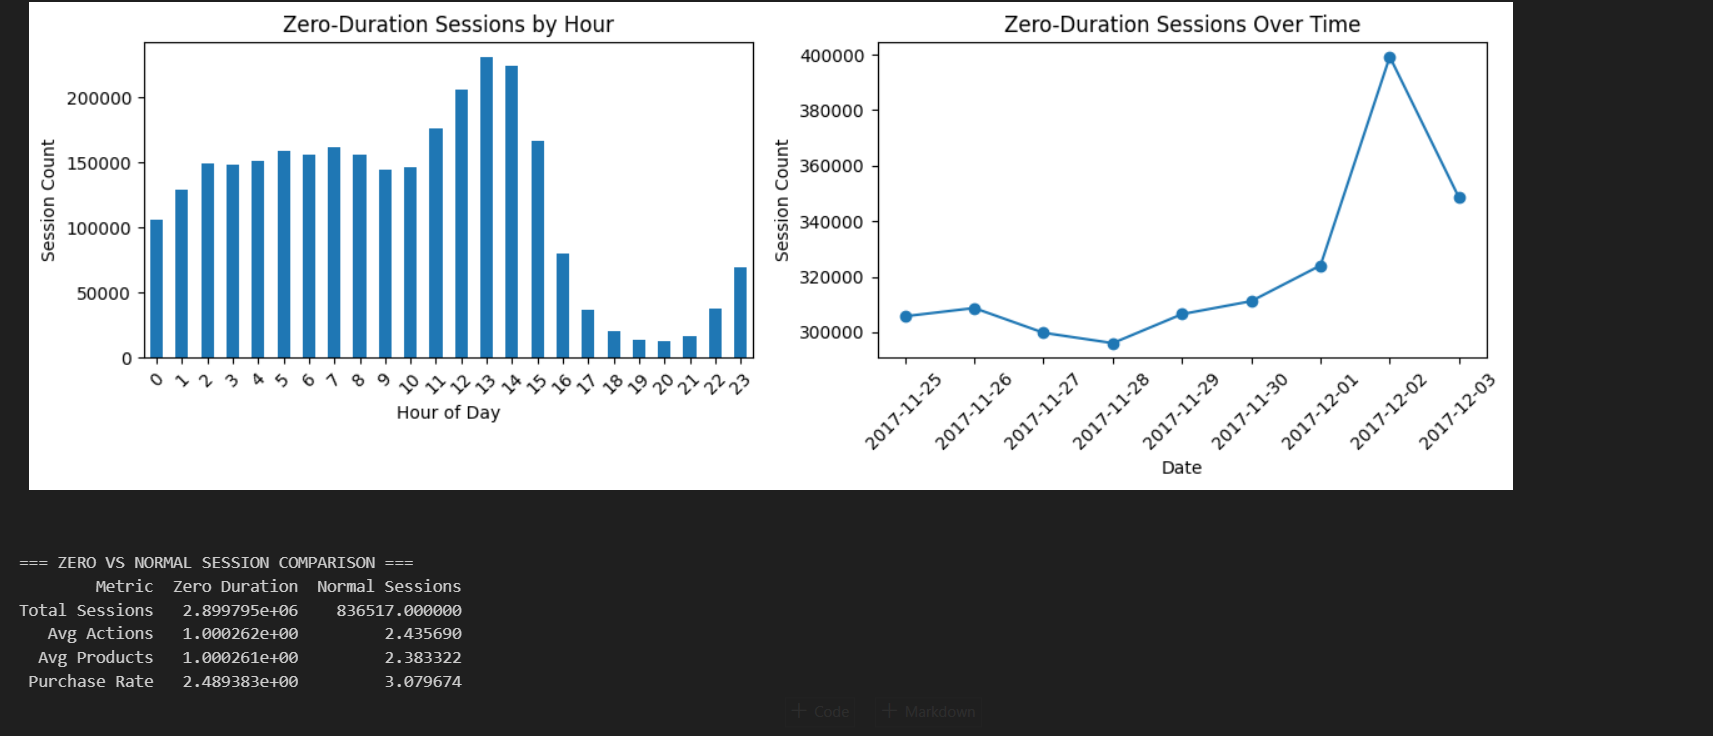

### FILTERING RESULTS to make a legitimate user dataframe for analysis

#### Basic Segregation

In [11]:
# import pandas as pd
# import numpy as np

# # === STEP 1: CALCULATE SESSION-LEVEL METRICS ===
# # Convert timestamp to datetime if needed
# if df['timestamp'].dtype == 'O':
#     df['timestamp'] = pd.to_datetime(df['timestamp'])

# # Calculate session-level statistics
# session_stats = df.groupby(['user_id', 'session_id']).agg({
#     'timestamp': ['min', 'max', 'count'],
#     'action': 'count',
#     'product_id': 'nunique'
# }).reset_index()

# # Flatten column names
# session_stats.columns = ['user_id', 'session_id', 'session_start', 'session_end', 
#                         'timestamp_count', 'action_count', 'unique_products']

# # Calculate session duration in seconds
# session_stats['session_duration'] = (
#     session_stats['session_end'] - session_stats['session_start']
# ).dt.total_seconds()

# # === STEP 2: IDENTIFY LEGITIMATE SESSIONS ===
# # Apply comprehensive bot filtering criteria
# legitimate_sessions = session_stats[
#     # Remove zero-duration sessions (bot indicator)
#     (session_stats['session_duration'] > 0) &
    
#     # Require multiple actions (meaningful engagement)
#     (session_stats['action_count'] > 1) &
    
#     # Reasonable session duration (not too long - potential bot)
#     (session_stats['session_duration'] <= 3600) &  # Max 1 hour
    
#     # Minimum session duration (at least 1 second)
#     (session_stats['session_duration'] >= 1)
# ].copy()

# print("=== FILTERING RESULTS ===")
# print(f"Original sessions: {len(session_stats):,}")
# print(f"Legitimate sessions: {len(legitimate_sessions):,}")
# print(f"Sessions removed: {len(session_stats) - len(legitimate_sessions):,}")
# print(f"Contamination rate: {((len(session_stats) - len(legitimate_sessions)) / len(session_stats) * 100):.2f}%")

# # === STEP 3: FILTER ORIGINAL DATAFRAME ===
# # Create a set of legitimate session identifiers for fast lookup
# legitimate_session_ids = set(
#     zip(legitimate_sessions['user_id'], legitimate_sessions['session_id'])
# )

# # Filter original dataframe to only include legitimate sessions
# df_filtered = df[
#     df.apply(lambda row: (row['user_id'], row['session_id']) in legitimate_session_ids, axis=1)
# ].copy()

# print(f"\nOriginal events: {len(df):,}")
# print(f"Events after filtering: {len(df_filtered):,}")
# print(f"Events removed: {len(df) - len(df_filtered):,}")
# print(f"Event reduction: {((len(df) - len(df_filtered)) / len(df) * 100):.2f}%")


=== FILTERING RESULTS ===
- Original sessions: 3,736,312
- Legitimate sessions: 832,260
- Sessions removed: 2,904,052
- Contamination rate: 77.73%

- Original events: 4,938,050
- Events after filtering: 2,010,084
- Events removed: 2,927,966
- Event reduction: 59.29%

#### Advanced Segregation and bot identification

In [12]:
# # === ADVANCED BOT DETECTION ===
# def detect_and_remove_bots(df, session_stats):
#     """
#     Advanced bot detection and removal based on behavioral patterns
#     """
    
#     # 1. Remove sessions with identical start/end timestamps
#     legitimate = session_stats[
#         session_stats['session_start'] != session_stats['session_end']
#     ].copy()
    
#     # 2. Remove users with excessive zero-duration sessions
#     user_zero_counts = session_stats[session_stats['session_duration'] == 0]['user_id'].value_counts()
#     bot_users = set(user_zero_counts[user_zero_counts >= 5].index)  # Users with 5+ zero sessions
    
#     legitimate = legitimate[~legitimate['user_id'].isin(bot_users)]
    
#     # 3. Remove sessions with unrealistic action rates (>5 actions per second)
#     legitimate['actions_per_second'] = legitimate['action_count'] / legitimate['session_duration']
#     legitimate = legitimate[
#         (legitimate['actions_per_second'] <= 5) |  # Max 5 actions/second
#         (legitimate['session_duration'] < 1)      # Or very short sessions
#     ]
    
#     # 4. Apply business logic filters
#     legitimate = legitimate[
#         (legitimate['action_count'] >= 2) &        # Minimum engagement
#         (legitimate['unique_products'] >= 1) &     # At least one product viewed
#         (legitimate['session_duration'] >= 0.1)   # Minimum 0.1 seconds
#     ]
    
#     return legitimate

# # Apply advanced filtering
# legitimate_sessions_advanced = detect_and_remove_bots(df, session_stats)

# print("=== ADVANCED FILTERING RESULTS ===")
# print(f"Sessions after basic filtering: {len(legitimate_sessions):,}")
# print(f"Sessions after advanced filtering: {len(legitimate_sessions_advanced):,}")
# print(f"Additional sessions removed: {len(legitimate_sessions) - len(legitimate_sessions_advanced):,}")


=== ADVANCED FILTERING RESULTS ===
- Sessions after basic filtering: 832,260
- Sessions after advanced filtering: 479,325
- Additional sessions removed: 352,935

# FINAL CLEAN DATASET 

In [13]:
# # === FINAL CLEAN DATASET ===
# # Use advanced legitimate sessions for final filtering
# final_legitimate_session_ids = set(
#     zip(legitimate_sessions_advanced['user_id'], legitimate_sessions_advanced['session_id'])
# )

# # Filter original dataframe
# df_clean = df[
#     df.apply(lambda row: (row['user_id'], row['session_id']) in final_legitimate_session_ids, axis=1)
# ].copy()

# # Add session metadata to clean dataframe
# df_clean = df_clean.merge(
#     legitimate_sessions_advanced[['user_id', 'session_id', 'session_duration', 'action_count']],
#     on=['user_id', 'session_id'],
#     how='left'
# )

# print("=== FINAL CLEAN DATASET ===")
# print(f"Clean events: {len(df_clean):,}")
# print(f"Clean sessions: {len(legitimate_sessions_advanced):,}")
# print(f"Clean users: {df_clean['user_id'].nunique():,}")
# print(f"Overall data retention: {(len(df_clean) / len(df) * 100):.2f}%")

# # Display sample of clean data
# print("\n=== SAMPLE CLEAN DATA ===")
# print(df_clean.head())



=== FINAL CLEAN DATASET ===
- Clean events: 1,158,762
- Clean sessions: 479,325
- Clean users: 302,980
- Overall data retention: 23.47%

In [15]:
# import random
# import pandas as pd

# def reservoir_sample_df(df, sample_size=500000):
#     reservoir = []
#     for i, row in enumerate(df.itertuples(index=False), start=1):
#         if i <= sample_size:
#             reservoir.append(row)
#         else:
#             j = random.randint(1, i)
#             if j <= sample_size:
#                 reservoir[j - 1] = row
#     # Convert list of namedtuples back to DataFrame
#     sampled_df = pd.DataFrame(reservoir, columns=df.columns)
#     return sampled_df

# # Example usage
# df_sampled = reservoir_sample_df(df, sample_size=500000)
# df=df_sampled
# df=df.sort_values(['user_id','timestamp'])
# df.reset_index(drop=True, inplace=True)
# df